# Predict heart disease rate by county in the US: Regression

## Compressed Notebook

The goal is to predict the rate of heart disease (per 100,000 individuals) across the United States at the county-level from other socioeconomic indicators. Data was scraped from the USDA ERS website.

The target column is labeled `heart_disease_mortality_per_100k` which is in the 'Training_labels.csv' file.

For more reference, you can access the original kaggle dataset here: [Microsoft Data Science Capstone](https://www.kaggle.com/nandvard/microsoft-data-science-capstone).

---

### Import neccessary modules and review the initial data

In [3]:
# Import neccessary packages for data wrangling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

# show all columns
pd.set_option('display.max_column', None)

# set style for seaborn plots
sns.set_style('whitegrid')

In [4]:
# establish helper functions

# function to print text in bold
def print_bold(_str):
    print("\033[1m" + _str + "\033[0m")

In [5]:
# Check out all the files used for this project
for file in os.listdir('../Data/predict heart disease rate'):
    print(file)

DataWrangling_output.csv
dfno_output.csv
df_output.csv
Test_values.csv
Training_labels.csv
Training_values.csv


### For this project, we will only be using the two 'Training_xxx' files.

We will not be using the 'Test_values.csv' file because it does not have any target values associated with it. This dataset was originally meant for a kaggle competition, where the 'Test_values.csv' file would generate a prediction file used for the competition.

In [6]:
# Load the training dataset
df = pd.read_csv('../Data/predict heart disease rate/Training_values.csv')
df.head(2)

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.23,0.131,0.089,NaN,0.332,13.0,2.8,15.09,1650.0,1489.0,a
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.19,0.090,0.082,0.181,0.265,10.0,2.3,19.79,2010.0,2480.0,a


In [7]:
# Print the shape of df and run the info() method on it
print(df.shape)
df.info()

(3198, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 34 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   row_id                                            3198 non-null   int64  
 1   area__rucc                                        3198 non-null   object 
 2   area__urban_influence                             3198 non-null   object 
 3   econ__economic_typology                           3198 non-null   object 
 4   econ__pct_civilian_labor                          3198 non-null   float64
 5   econ__pct_unemployment                            3198 non-null   float64
 6   econ__pct_uninsured_adults                        3196 non-null   float64
 7   econ__pct_uninsured_children                      3196 non-null   float64
 8   demo__pct_female                                  3196 non-null   float64
 9   demo__pc

In [8]:
df.describe()

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician
count,3198.000000,3198.000000,3198.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3196.000000,2734.000000,3196.000000,3016.000000,2220.000000,3196.000000,3170.000000,1231.000000,2781.000000,2954.000000,2968.000000
mean,3116.985616,0.467191,0.059696,0.217463,0.086067,0.498811,0.227715,0.170043,0.090207,0.091046,0.769989,0.024680,0.013109,0.148815,0.350567,0.301143,0.199475,11.676986,10.301126,0.307668,0.213628,0.109260,0.083896,0.164841,0.277161,11.625868,5.947498,21.132618,3431.433649,2551.339286
std,1830.236781,0.074400,0.022947,0.067362,0.039849,0.024399,0.034282,0.043694,0.142763,0.147165,0.207850,0.084563,0.025431,0.068208,0.070554,0.052318,0.089308,2.739516,2.786143,0.043228,0.062895,0.023216,0.022251,0.050474,0.053003,1.557996,5.031822,10.485923,2569.450603,2100.459467
min,0.000000,0.207000,0.010000,0.046000,0.012000,0.278000,0.092000,0.045000,0.000000,0.000000,0.053000,0.000000,0.000000,0.015075,0.065327,0.109548,0.011078,4.000000,0.000000,0.131000,0.046000,0.032000,0.033000,0.038000,0.090000,7.000000,-0.400000,3.140000,339.000000,189.000000
25%,1504.250000,0.420000,0.044000,0.166000,0.057000,0.493000,0.206000,0.141000,0.019000,0.006000,0.649000,0.002000,0.002000,0.096588,0.305357,0.264861,0.139234,10.000000,8.000000,0.284000,0.172000,0.094000,0.069000,0.130000,0.242750,10.000000,2.620000,13.490000,1812.250000,1420.000000
50%,3113.500000,0.468000,0.057000,0.216000,0.077000,0.503000,0.226000,0.167000,0.035000,0.022000,0.853000,0.007000,0.007000,0.133234,0.355015,0.301587,0.176471,11.000000,10.000000,0.309000,0.210000,0.109000,0.081000,0.164000,0.280000,12.000000,4.700000,19.630000,2690.000000,1999.000000
75%,4724.750000,0.514000,0.072000,0.261000,0.106000,0.512000,0.246000,0.195000,0.087000,0.096000,0.936250,0.014000,0.013000,0.194796,0.399554,0.336590,0.231354,13.000000,12.000000,0.334000,0.249000,0.124000,0.095000,0.197000,0.313000,13.000000,7.890000,26.490000,4089.750000,2859.000000
max,6276.000000,1.000000,0.248000,0.496000,0.281000,0.573000,0.417000,0.346000,0.932000,0.858000,0.990000,0.859000,0.341000,0.473526,0.558912,0.473953,0.798995,29.000000,27.000000,0.471000,0.513000,0.203000,0.238000,0.367000,0.442000,15.000000,50.490000,110.450000,28130.000000,23399.000000


---
#### Since our target column is not in this CSV file, we will add it to our dataframe using the `Training_labels.csv` file

In [9]:
target_vals = pd.read_csv('../Data/predict heart disease rate/Training_labels.csv')
target_vals.head()

,row_id,heart_disease_mortality_per_100k
0,0,312
1,1,257
2,4,195
3,5,218
4,6,355


In [10]:
# merge dataframes using the 'row_id' column to merge on 'row_id'
df = pd.merge(df, target_vals, on='row_id')
df.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230,0.131,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a,312
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190,0.090,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a,257
2,4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156,0.084,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b,195
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,NaN,0.104,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b,218
4,6,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234,0.137,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a,355


In [11]:
# Print the shape of df
df.shape

(3198, 35)

#### Now that we have linked the target variable with the features, we are going to drop the `row_id` column since it serves no purpose.

In [12]:
df = df.drop('row_id', axis=1)

### Quick, lets review the columns

#### Column descriptions
    
| Column | Description |
| --- | --- |
| **area__** | **information about the county** |
| area__rucc | Rural-Urban Continuum Codes "form a classification scheme that distinguishes metropolitan counties by the population size of their metro area, and nonmetropolitan counties by degree of urbanization and adjacency to a metro area. The official Office of Management and Budget (OMB) metro and nonmetro categories have been subdivided into three metro and six nonmetro categories. Each county in the U.S. is assigned one of the 9 codes." (USDA Economic Research Service, https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/) |
| area_urbaninfluence | Urban Influence Codes "form a classification scheme that distinguishes metropolitan counties by population size of their metro area, and nonmetropolitan counties by size of the largest city or town and proximity to metro and micropolitan areas." (USDA Economic Research Service, https://www.ers.usda.gov/data-products/urban-influence-codes/) |
| **econ__** | **economic indicators** |
| econ_economictypology | County Typology Codes "classify all U.S. counties according to six mutually exclusive categories of economic dependence and six overlapping categories of policy-relevant themes. The economic dependence types include farming, mining, manufacturing, Federal/State government, recreation, and nonspecialized counties. The policy-relevant types include low education, low employment, persistent poverty, persistent child poverty, population loss, and retirement destination." (USDA Economic Research Service, https://www.ers.usda.gov/data-products/county-typology-codes.aspx) |
| econ_pctcivilian_labor | Civilian labor force, annual average, as percent of population (Bureau of Labor Statistics, http://www.bls.gov/lau/) |
| econ_pctunemployment | Unemployment, annual average, as percent of population (Bureau of Labor Statistics, http://www.bls.gov/lau/) |
| econpctuninsuredadults | Percent of adults without health insurance (Bureau of Labor Statistics, http://www.bls.gov/lau/)|
| econpctuninsuredchildren | Percent of children without health insurance (Bureau of Labor Statistics, http://www.bls.gov/lau/) |
| **health__** | **health indicators** |
| health_pctadult_obesity | Percent of adults who meet clinical definition of obese (National Center for Chronic Disease Prevention and Health Promotion) |
| health_pctadult_smoking | Percent of adults who smoke (Behavioral Risk Factor Surveillance System) |
| health_pctdiabetes | Percent of population with diabetes (National Center for Chronic Disease Prevention and Health Promotion, Division of Diabetes Translation) |
| health_pctlow_birthweight | Percent of babies born with low birth weight (National Center for Health Statistics) |
| health_pctexcessive_drinking | Percent of adult population that engages in excessive consumption of alcohol (Behavioral Risk Factor Surveillance System, ) |
| health_pctphysical_inacticity | Percent of adult population that is physically inactive (National Center for Chronic Disease Prevention and Health Promotion) |
| health_airpollutionparticulatematter | Fine particulate matter in µg/m³ (CDC WONDER, https://wonder.cdc.gov/wonder/help/pm.html) |
| health_homicidesper_100k | Deaths by homicide per 100,000 population (National Center for Health Statistics) |
| health_motorvehiclecrashdeathsper100k | Deaths by motor vehicle crash per 100,000 population (National Center for Health Statistics) |
| health_popper_dentist | Population per dentist (HRSA Area Resource File) |
| health_popperprimarycare_physician | Population per Primary Care Physician (HRSA Area Resource File) |
| **demo__** | **demographics information** |
| demo_pctfemale | Percent of population that is female (US Census Population Estimates) |
| demo_pctbelow18yearsofage | Percent of population that is below 18 years of age (US Census Population Estimates) |
| demo_pctaged65yearsandolder | Percent of population that is aged 65 years or older (US Census Population Estimates) |
| demo_pcthispanic | Percent of population that identifies as Hispanic (US Census Population Estimates) |
| demo_pctnonhispanicafrican_american | Percent of population that identifies as African American (US Census Population Estimates) |
| demo_pctnonhispanicwhite | Percent of population that identifies as Hispanic and White (US Census Population Estimates) |
| demo_pctamericanindianoralaskannative | Percent of population that identifies as Native American (US Census Population Estimates) |
| demo_pctasian | Percent of population that identifies as Asian (US Census Population Estimates) |
| demo_pctadultslessthanahighschooldiploma | Percent of adult population that does not have a high school diploma (US Census, American Community Survey) |
| demo_pctadultswithhighschooldiploma | Percent of adult population which has a high school diploma as highest level of education achieved (US Census, American Community Survey) |
| demo_pctadultswithsome_college | Percent of adult population which has some college as highest level of education achieved (US Census, American Community Survey) |
| demo_pctadultsbachelorsor_higher | Percent of adult population which has a bachelor's degree or higher as highest level of education achieved (US Census, American Community Survey) |
| demo_birthrateper1k | Births per 1,000 of population (US Census Population Estimates) |
| demo_deathrateper1k | Deaths per 1,000 of population (US Census Population Estimates) |
| yr | denoted by 'a' and 'b' - they represent two different years |

## Data Wrangling
**Lets take a look at the categorical features**

In [12]:
# Identify the categorical features and their unique values
for feat in df.columns:
    if df[feat].dtype == 'O':
        print(f'{feat.upper()} - {df[feat].nunique()}\n{df[feat].unique()}\n')

AREA__RUCC - 9
['Metro - Counties in metro areas of fewer than 250,000 population'
 'Metro - Counties in metro areas of 1 million population or more'
 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area'
 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area'
 'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area'
 'Metro - Counties in metro areas of 250,000 to 1 million population'
 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area'
 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area'
 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area']

AREA__URBAN_INFLUENCE - 12
['Small-in a metro area with fewer than 1 million residents'
 'Large-in a metro area with at least 1 million residents or more'
 'Noncore adjacent to a small metro with town of at least 2,500 residents'
 'Noncore not adjacent to a metro/micro area and

**Features `area__rucc` and `area__urban_influence` are very specific. Lets try to break these features into simpler categories.**

Starting with the feature `area__rucc`, lets break it up into two categories 'Metro' and 'Nonmetro'. And we will do the same for `area__urban_influence` and parse out the first word of the description.

In [13]:
df.area__rucc = df.area__rucc.apply(lambda x: x.split()[0])
df.area__urban_influence = df.area__urban_influence.apply(lambda x: x.split()[0])

In [14]:
df.head()

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,Metro,Small-in,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230,0.131,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a,312
1,Metro,Small-in,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190,0.090,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a,257
2,Metro,Large-in,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156,0.084,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b,195
3,Nonmetro,Noncore,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,NaN,0.104,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b,218
4,Nonmetro,Noncore,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234,0.137,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a,355


It looks like a majority of the feature plots are normally distributed, with the exception of a few plots with the prefix `demo__` indicating there might be a large amount of outliers.

#### Lets look at these categorical features in correlation to the target variable `heart_disease_mortality_per_100k`

In [15]:
# create a correlation table
corr_vals = df.corr()['heart_disease_mortality_per_100k'].sort_values()[:-1]

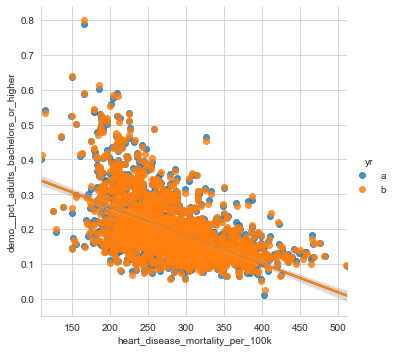

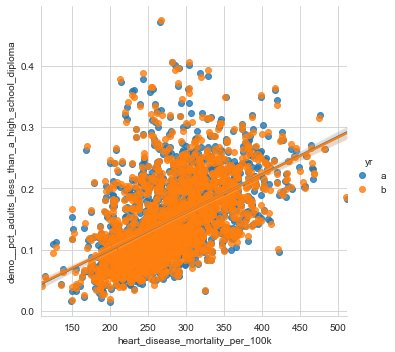

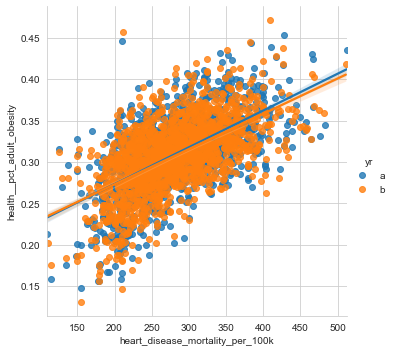

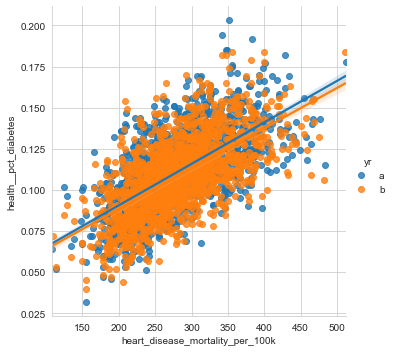

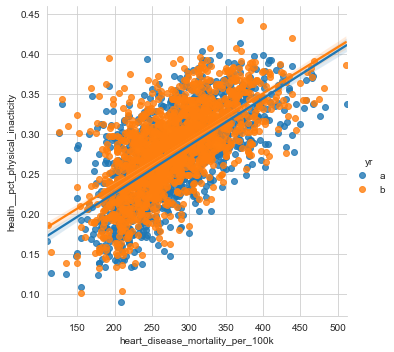

In [16]:
# plot out all features with a correlation value of magnitude 0.5 or greater
for row in corr_vals.index:
    if abs(corr_vals[row]) >= 0.5:
        x = 'heart_disease_mortality_per_100k'
        y = row

        _ = sns.lmplot(x, y, data=df, hue='yr')

Looking at the above plots, the feature `yr` does not make a noticable difference to the data. We will proceed to dropping this feature.

In [17]:
df = df.drop('yr', axis=1)

**The above plotting method was used for all categorical features. This can be seen in the "PHDR_detailed_notebook" for more reference.**

In conclusion, all other categorical features were found to be essential for the model. Only `yr` was deleted from the data.

### Now we will perform some EDA on the numerical features.
Plot histograms for all features to check out the distributions

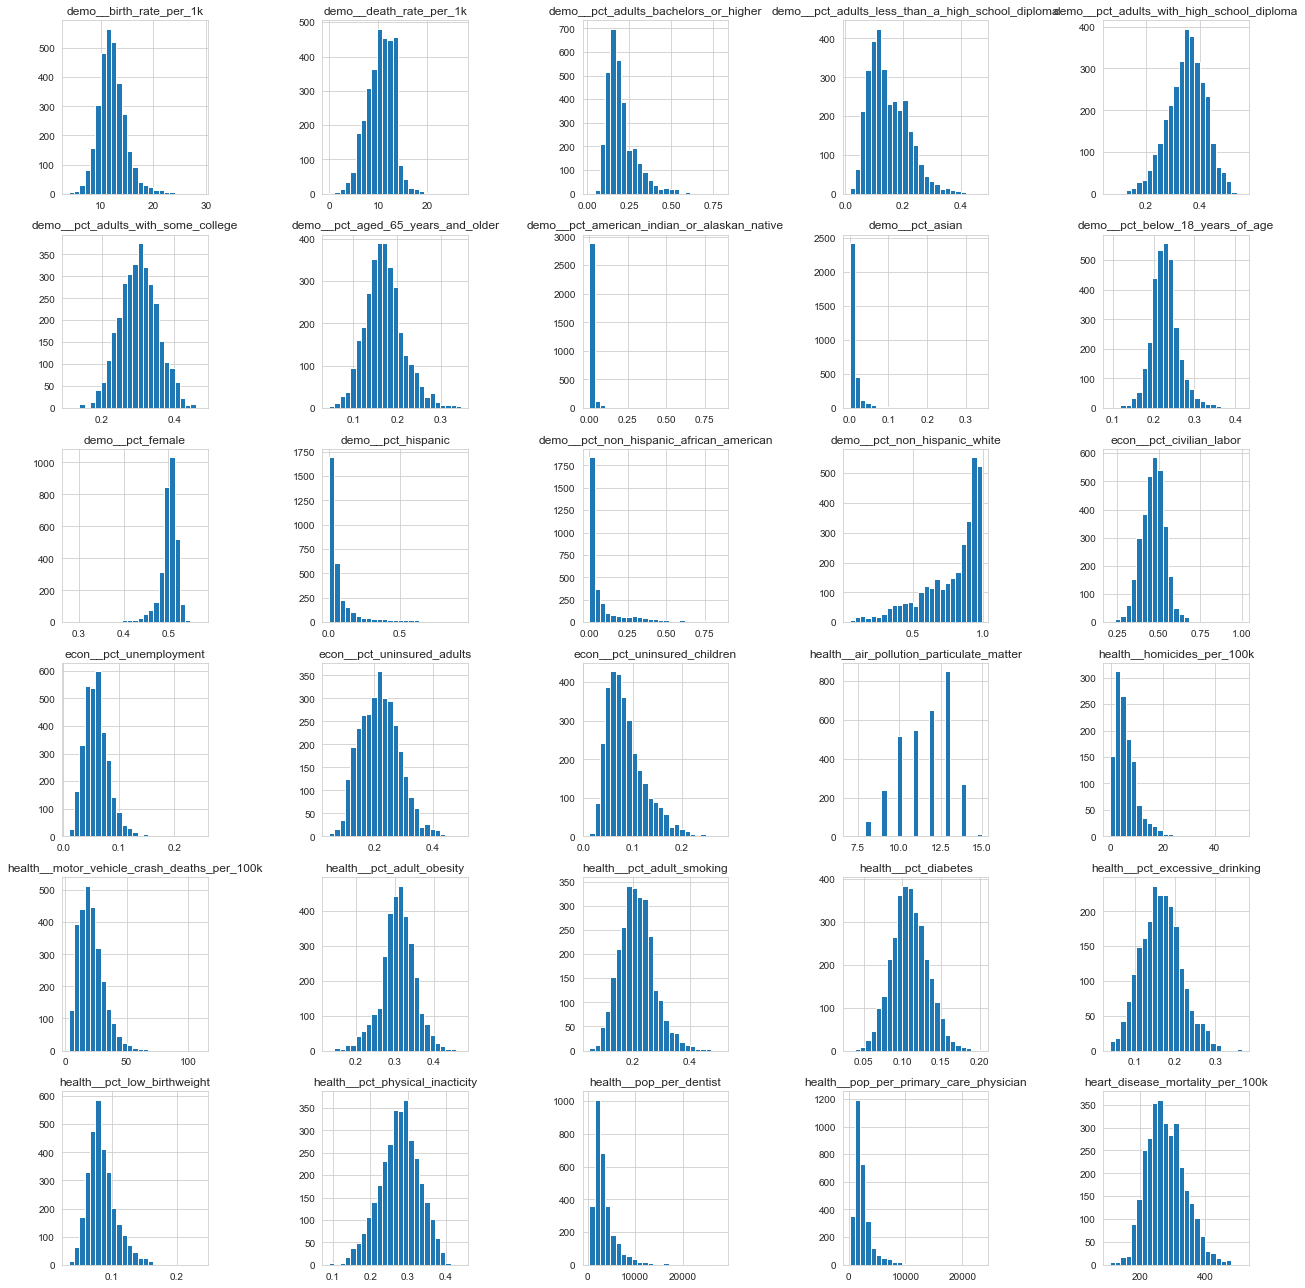

In [21]:
_ = df.hist(figsize=(18, 18), bins=25)
_ = plt.tight_layout()
plt.show()

It looks like most of the features have a normal distribution, but the `demo__` features seem to have a few that are skewed. This would indicate that there are some major outliers in these features. We will explore these.

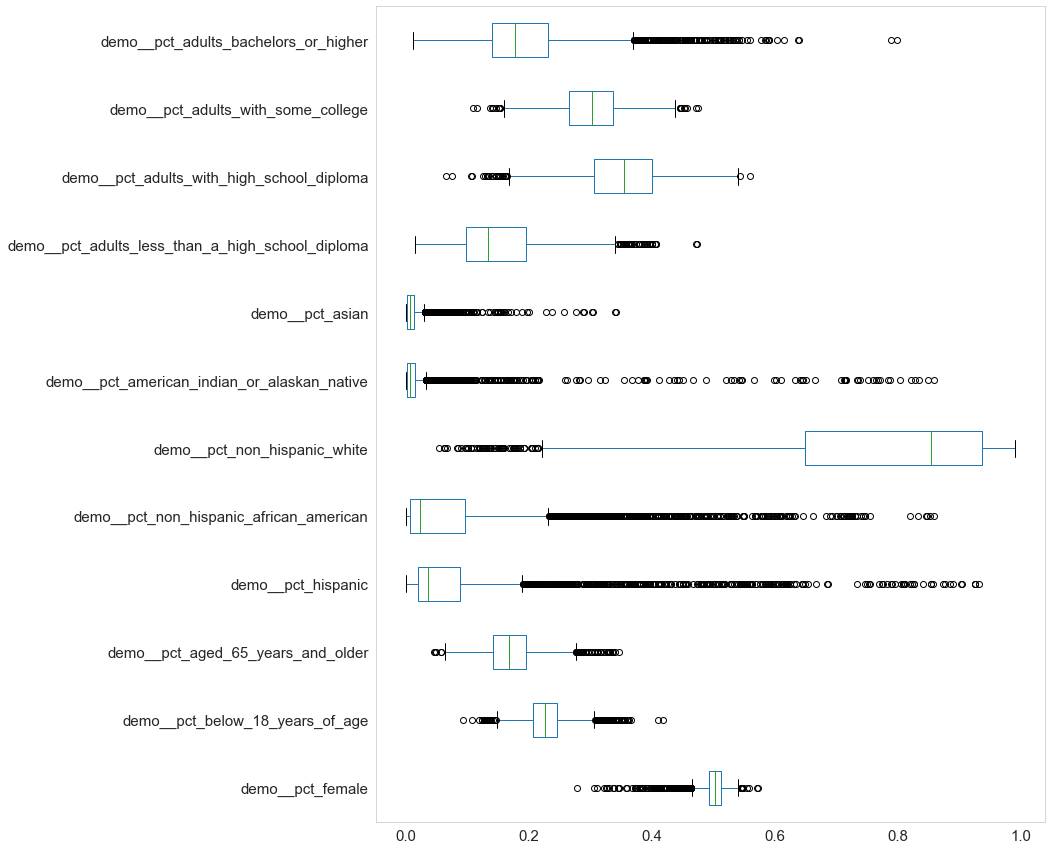

In [22]:
pct_list = list()

for col in df.columns:
    if 'demo__' in col and '_pct' in col:
        pct_list.append(col)
df[pct_list].boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))
plt.show()

As we can see, the box plots above show there are many cases of extreme outliers. We will handle these outliers, and look at the result to make a decision if they should be removed from the data.

**We will do this once we are done cleaning the data...**

### Let's review the missing data in this data frame.

In [23]:
# group data for column names, datatype, and null values and percent for each column
dtypes = pd.DataFrame(df.dtypes.values, columns=['dtype'])
dcolumns = pd.DataFrame(df.columns, columns=['Column Name'])
dnull = pd.DataFrame(df.isnull().sum().values, columns=['NaN count'])
dnullpct = pd.DataFrame(data=(100 * (df.isnull().sum() / len(df))).values, columns=['Percent NaN'])

# print column names with associated datatype and percent of null values
df_defs = pd.concat([dcolumns, dtypes, dnull, dnullpct], axis=1)
df_defs

,Column Name,dtype,NaN count,Percent NaN
0,area__rucc,object,0,0.000000
1,area__urban_influence,object,0,0.000000
2,econ__economic_typology,object,0,0.000000
3,econ__pct_civilian_labor,float64,0,0.000000
4,econ__pct_unemployment,float64,0,0.000000
5,econ__pct_uninsured_adults,float64,2,0.062539
6,econ__pct_uninsured_children,float64,2,0.062539
7,demo__pct_female,float64,2,0.062539
8,demo__pct_below_18_years_of_age,float64,2,0.062539
9,demo__pct_aged_65_years_and_older,float64,2,0.062539


## Data Cleaning
    
Handling the missing values

In [24]:
# only review the columns with missing values...
df_defs[df_defs['Percent NaN'] > 0]

,Column Name,dtype,NaN count,Percent NaN
5,econ__pct_uninsured_adults,float64,2,0.062539
6,econ__pct_uninsured_children,float64,2,0.062539
7,demo__pct_female,float64,2,0.062539
8,demo__pct_below_18_years_of_age,float64,2,0.062539
9,demo__pct_aged_65_years_and_older,float64,2,0.062539
10,demo__pct_hispanic,float64,2,0.062539
11,demo__pct_non_hispanic_african_american,float64,2,0.062539
12,demo__pct_non_hispanic_white,float64,2,0.062539
13,demo__pct_american_indian_or_alaskan_native,float64,2,0.062539
14,demo__pct_asian,float64,2,0.062539


#### It seems that there are many columns that only have 2 values missing, we will ignore them for now. Let's start by looking at the column with the most missing data: `health__homicides_per_100k`

In [25]:
df['health__homicides_per_100k'].describe()

count    1231.000000
mean        5.947498
std         5.031822
min        -0.400000
25%         2.620000
50%         4.700000
75%         7.890000
max        50.490000
Name: health__homicides_per_100k, dtype: float64

This column contains more that 61% missing values, and does not indicate that NaN values would be 0 percent, therefore we will drop the column.

In [26]:
# drop the 'health__homicides_per_100k' column
df.drop('health__homicides_per_100k', axis=1, inplace=True)

Let's look at all the columns with less than 10% of missing values.
    
We will create a table that can be used to get the average value for each column based on 3 categorical columns

In [27]:
# Create a table that produces the mean values for each column based on:
# 'area__rucc', 'area__urban_influence', and 'econ_economic_typology'
mean_table = df.groupby(['area__rucc', 'area__urban_influence', 'econ__economic_typology']).mean()

#### The table `mean_table` will be used to fill missing values for all features with less than 10% missing values

The table is created using the groupby() function, which will categorize all other features into a single aggregate value (in our case, the mean value). The function below will then pull the mean value from this table for the specific feature index that it has a missing value for.

In [29]:
# Create a function to be used in the .apply() method to retrieve mean values for missing data
def fillna_vals(val, table, columns=[], id_col=None):
    
    '''
    This function will fill NaN values with the given inputs:
    val - Target column for filling NaN values
    table - Table that will be used for indexing from and retrieving a value
    columns - Default is an empty list. Create a list of which columns are used to index from the given table argument.
    id_col - Default is None. Used to identify a column from a table that has multiple target columns with values.
    '''
    
    if id_col == None:
        if pd.isnull(val):
            # check to see if there is a null/None value in the list; we will ignore these and return a NaN value
            if None in columns:
                return np.nan
            else:
                return float(table.xs(columns))
        else:
            return val
    else:
        if pd.isnull(val):
            if None in columns:
                return pd.isnull()
            else:
                return float(table.xs(columns)[id_col])
        else:
            return val

In [30]:
# Create a df with columns that are less than 10% missing values (ignoring columns with only 2 missing values!)
df_10pct = df_defs[(df_defs['Percent NaN'] > 0) & (df_defs['Percent NaN'] <= 10) & (df_defs['NaN count'] != 2)]
df_10pct

,Column Name,dtype,NaN count,Percent NaN
24,health__pct_low_birthweight,float64,182,5.691057
27,health__air_pollution_particulate_matter,float64,28,0.875547
30,health__pop_per_dentist,float64,244,7.629769
31,health__pop_per_primary_care_physician,float64,230,7.191995


In [31]:
for col in df_10pct['Column Name']:
    df[col] = df.apply(lambda x: fillna_vals(x[col], mean_table, columns=[x['area__rucc'], x['area__urban_influence'],
                                                                          x['econ__economic_typology']], id_col=col), axis=1)

The above function is applying the function created above to each of the feature columns that has less than 10% missing values.

In [32]:
df.head()

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k
0,Metro,Small-in,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230,0.131,0.089,NaN,0.332,13.0,15.09,1650.0,1489.0,312
1,Metro,Small-in,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190,0.090,0.082,0.181,0.265,10.0,19.79,2010.0,2480.0,257
2,Metro,Large-in,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156,0.084,0.098,0.195,0.209,10.0,3.14,629.0,690.0,195
3,Nonmetro,Noncore,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,NaN,0.104,0.058,NaN,0.238,13.0,NaN,1810.0,6630.0,218
4,Nonmetro,Noncore,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234,0.137,0.070,0.194,0.290,9.0,29.39,3489.0,2590.0,355


In [33]:
# Check the null count for all the columns in df
df.isnull().sum()

area__rucc                                            0
area__urban_influence                                 0
econ__economic_typology                               0
econ__pct_civilian_labor                              0
econ__pct_unemployment                                0
econ__pct_uninsured_adults                            2
econ__pct_uninsured_children                          2
demo__pct_female                                      2
demo__pct_below_18_years_of_age                       2
demo__pct_aged_65_years_and_older                     2
demo__pct_hispanic                                    2
demo__pct_non_hispanic_african_american               2
demo__pct_non_hispanic_white                          2
demo__pct_american_indian_or_alaskan_native           2
demo__pct_asian                                       2
demo__pct_adults_less_than_a_high_school_diploma      0
demo__pct_adults_with_high_school_diploma             0
demo__pct_adults_with_some_college              

Now lets look at the remaining columns with more than 10% missing values

In [34]:
df_GT10pct = df_defs[(df_defs['Percent NaN'] > 10) & (df_defs['Percent NaN'] < 60)]
df_GT10pct

,Column Name,dtype,NaN count,Percent NaN
22,health__pct_adult_smoking,float64,464,14.509068
25,health__pct_excessive_drinking,float64,978,30.581614
29,health__motor_vehicle_crash_deaths_per_100k,float64,417,13.039400


Let's review the 'health__pct_excessive_drinking' column since it has the most missing values.

In [93]:
# review the range of the feature using the describe method
df['health__pct_excessive_drinking'].describe()

count    3163.000000
mean        0.159919
std         0.045327
min         0.038000
25%         0.130000
50%         0.157000
75%         0.187964
max         0.367000
Name: health__pct_excessive_drinking, dtype: float64

#### Next, we will find which features are highly correlated to the feature `health__pct_excessive_drinking`.
We will use these highly correlated features to create a mean value to fill our missing values.

In [36]:
# determine which columns are most correlated to this column
print(df.corr()['health__pct_excessive_drinking'].sort_values()[:-1])

demo__pct_adults_less_than_a_high_school_diploma   -0.412436
health__pct_diabetes                               -0.384207
heart_disease_mortality_per_100k                   -0.382172
health__pct_low_birthweight                        -0.375514
econ__pct_uninsured_adults                         -0.340959
health__pct_physical_inacticity                    -0.337469
demo__pct_non_hispanic_african_american            -0.284243
health__pct_adult_obesity                          -0.235439
demo__pct_female                                   -0.215347
econ__pct_unemployment                             -0.214149
health__air_pollution_particulate_matter           -0.194161
health__motor_vehicle_crash_deaths_per_100k        -0.175239
demo__death_rate_per_1k                            -0.149701
demo__pct_below_18_years_of_age                    -0.125961
health__pop_per_dentist                            -0.117386
demo__birth_rate_per_1k                            -0.108256
health__pct_adult_smokin

Looking at the correlating columns, it looks like `econ__pct_civilian_labor` is most positively correlated, and `demo__pct_adults_less_than_a_high_school_diploma` is most negatively correlated.
    
These features will now be used to create mean value.

In order to create a table which will produce a mean value, we need to put the numerical features into categories. To do this, we will find the range of the values, the mean, and the standard deviation to create the most fit categories. For this, use the `describe()` method.



In [37]:
# Review the .describe() method for the two correlated columns to determine how to chunk the data into categorical columns
# example: 0-5%, 5-10%, etc...
df[['econ__pct_civilian_labor', 'demo__pct_adults_less_than_a_high_school_diploma']].describe()

,econ__pct_civilian_labor,demo__pct_adults_less_than_a_high_school_diploma
count,3198.000000,3198.000000
mean,0.467191,0.148815
std,0.074400,0.068208
min,0.207000,0.015075
25%,0.420000,0.096588
50%,0.468000,0.133234
75%,0.514000,0.194796
max,1.000000,0.473526


Based on the information in the previous table, the features will be 'chunked' into several categories.
    
e.g. for feature `econ__pct_civilian_labor`, the min value is 0.207 (or 20.7%), the max value is 1.000, the mean is 0.467, and the std is 0.074. Since roughly 68% of our values lie within the first standard deviation, we will want to make sure that the bulk of our categories are around the first std. Therefore, we will use reason to chunk the categories as follows: `20-30, 30-40, 40-45, 45-50, 50-55, 55-60, 60-80, 80-100`. As we get closer to the mean, the chunk size gets smaller because there will be more points that fall within these categories. Ensuring we include the min and max, we start at 20%, and end with 100%. The chunk categories are broken into an integer percentage (since the feature is a percentage).

#### We will do this same procedure for all features that had more than 10% missing values.
    
| Column | range, mean, std | Chunk categories (%) |
| --- | --- | --- |
| econ__pct_civilian_labor | 0.207-1.000, 0.467, 0.074 | 20-30, 30-40, 40-45, 45-50, 50-55, 55-60, 60-80, 80-100 |
| demo__pct_adults_less_than_a_high_school_diploma | 0.015-0.474, 0.149, 0.068 | 0-5, 5-10, 10-15, 15-20, 20-30, 30-40, 40-50 |

In [38]:
# Create the functions that will generate the new columns based on chunk size in the previous table
def chunk_econ_pcl(val):
    if val > 0.20 and val <= 0.30:
        return '20-30'
    elif val > 0.30 and val <= 0.40:
        return '30-40'
    elif val > 0.40 and val <= 0.45:
        return '40-45'
    elif val > 0.45 and val <= 0.50:
        return '45-50'
    elif val > 0.50 and val <= 0.55:
        return '50-55'
    elif val > 0.55 and val <= 0.60:
        return '55-60'
    elif val > 0.60 and val <= 0.80:
        return '60-80'
    elif val > 0.80 and val <= 1.00:
        return '80-100'
    
def chunk_demo_hs_diplo(val):
    if val > 0.00 and val <= 0.05:
        return '0-5'
    elif val > 0.05 and val <= 0.10:
        return '5-10'
    elif val > 0.10 and val <= 0.15:
        return '10-15'
    elif val > 0.15 and val <= 0.20:
        return '15-20'
    elif val > 0.20 and val <= 0.30:
        return '20-30'
    elif val > 0.30 and val <= 0.40:
        return '30-40'
    elif val > 0.40 and val <= 0.50:
        return '40-50'

#### Below, we will create a dataframe that will be used to pull the mean values from to fill our missing values.

In [39]:
# create the dataframe that will be used for filtering the data
df_drink = df[['health__pct_excessive_drinking','econ__pct_civilian_labor', 'demo__pct_adults_less_than_a_high_school_diploma']]

# use the .apply() method to create new columns based on the previously created functions
df_drink['econ__pct_civlab_cat'] = df_drink['econ__pct_civilian_labor'].apply(chunk_econ_pcl)
df_drink['demo__pct_less_hs_diplo_cat'] = df_drink['demo__pct_adults_less_than_a_high_school_diploma'].apply(chunk_demo_hs_diplo)
df_drink.isnull().sum()

C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


health__pct_excessive_drinking                      978
econ__pct_civilian_labor                              0
demo__pct_adults_less_than_a_high_school_diploma      0
econ__pct_civlab_cat                                  0
demo__pct_less_hs_diplo_cat                           0
dtype: int64

In [40]:
# view the head of the new df df_drink
df_drink.head()

,health__pct_excessive_drinking,econ__pct_civilian_labor,demo__pct_adults_less_than_a_high_school_diploma,econ__pct_civlab_cat,demo__pct_less_hs_diplo_cat
0,NaN,0.408,0.194223,40-45,15-20
1,0.181,0.556,0.164134,55-60,15-20
2,0.195,0.541,0.158573,50-55,15-20
3,NaN,0.500,0.181637,45-50,15-20
4,0.194,0.471,0.122367,45-50,10-15


In [41]:
# Lets create the new table that will be used to filter the mean values by the correlated features
df_drink_table = df_drink.drop(['econ__pct_civilian_labor','demo__pct_adults_less_than_a_high_school_diploma'],
                               axis=1).groupby(['econ__pct_civlab_cat','demo__pct_less_hs_diplo_cat']).mean()

In [43]:
# use the df_drink_table to retrieve values for rows that have NaN values for 'health__pct_excessive_drinking'
# using the fillna_vals() function
df['health__pct_excessive_drinking'] = df_drink.apply(lambda x: fillna_vals(x['health__pct_excessive_drinking'], df_drink_table,
                                                                      columns=[x['econ__pct_civlab_cat'], x['demo__pct_less_hs_diplo_cat']]),
                                                axis=1)

### Do the same as above for the remaining two columns with more than 10% missing values

In [44]:
# drop 'health__pct_excessive_drinking' (index 25) to view the remaining columns
df_GT10pct.drop(25)

,Column Name,dtype,NaN count,Percent NaN
22,health__pct_adult_smoking,float64,464,14.509068
29,health__motor_vehicle_crash_deaths_per_100k,float64,417,13.039400


In [45]:
# determine which columns are most correlated to this column
df.corr()['health__pct_adult_smoking'].sort_values()[:-1]

demo__pct_adults_bachelors_or_higher               -0.522427
econ__pct_civilian_labor                           -0.432774
demo__pct_asian                                    -0.300080
demo__pct_adults_with_some_college                 -0.220110
demo__pct_hispanic                                 -0.203549
health__pct_excessive_drinking                     -0.143918
demo__pct_female                                   -0.061542
demo__pct_below_18_years_of_age                    -0.001050
econ__pct_uninsured_children                        0.005351
demo__pct_non_hispanic_african_american             0.025176
demo__pct_aged_65_years_and_older                   0.038207
demo__birth_rate_per_1k                             0.038505
demo__pct_non_hispanic_white                        0.039222
health__air_pollution_particulate_matter            0.195983
demo__pct_american_indian_or_alaskan_native         0.206414
health__pop_per_primary_care_physician              0.237388
health__pct_low_birthwei

The highest correlated features are `health__pct_physical_inacticity` and `demo__pct_adults_bachelors_or_higher `

In [46]:
df[['health__pct_physical_inacticity', 'demo__pct_adults_bachelors_or_higher']].describe()

,health__pct_physical_inacticity,demo__pct_adults_bachelors_or_higher
count,3196.000000,3198.000000
mean,0.277161,0.199475
std,0.053003,0.089308
min,0.090000,0.011078
25%,0.242750,0.139234
50%,0.280000,0.176471
75%,0.313000,0.231354
max,0.442000,0.798995


Based on the information above, the columns above will be used to create 2 new categorical columns split up by the following:
    
| Column | range, mean, std | Chunk categories (%) |
| --- | --- | --- |
| health__pct_physical_inacticity | 0.090-0.442, 0.277, 0.053 | 0-10, 10-20, 20-25, 30-35, 35-45|
| demo__pct_adults_bachelors_or_higher | 0.011-0.799, 0.199, 0.089 | 0-10, 10-15, 15-20, 20-25, 25-30, 30-40, 40-60, 60-80 |

In [47]:
# Create the functions that will generate the new columns based on chunk size
def chunk_physinact(val):
    if val > 0.00 and val <= 0.10:
        return '0-10'
    elif val > 0.10 and val <= 0.20:
        return '10-20'
    elif val > 0.20 and val <= 0.25:
        return '20-25'
    elif val > 0.25 and val <= 0.30:
        return '25-30'
    elif val > 0.30 and val <= 0.35:
        return '30-35'
    elif val > 0.35 and val <= 0.45:
        return '35-45'
    
def chunk_bachorhigher(val):
    if val > 0.00 and val <= 0.10:
        return '0-10'
    elif val > 0.10 and val <= 0.15:
        return '10-15'
    elif val > 0.15 and val <= 0.20:
        return '15-20'
    elif val > 0.20 and val <= 0.25:
        return '20-25'
    elif val > 0.25 and val <= 0.30:
        return '25-30'
    elif val > 0.30 and val <= 0.40:
        return '30-40'
    elif val > 0.40 and val <= 0.60:
        return '40-60'
    elif val > 0.60 and val <= 0.80:
        return '60-80'

In [48]:
# create the dataframe that will be used for filtering the data
df_smoke = df[['health__pct_adult_smoking','health__pct_physical_inacticity', 'demo__pct_adults_bachelors_or_higher']]

# use the .apply() method to create new columns based on the previously created functions
df_smoke['health__phys_inact_cat'] = df_smoke['health__pct_physical_inacticity'].apply(chunk_physinact)
df_smoke['demo__bach_higher_cat'] = df_smoke['demo__pct_adults_bachelors_or_higher'].apply(chunk_bachorhigher)
df_smoke.isnull().sum()

C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


health__pct_adult_smoking               464
health__pct_physical_inacticity           2
demo__pct_adults_bachelors_or_higher      0
health__phys_inact_cat                    2
demo__bach_higher_cat                     0
dtype: int64

In [49]:
df_smoke_table = df_smoke.drop(['health__pct_physical_inacticity',
                                'demo__pct_adults_bachelors_or_higher'],
                               axis=1).groupby(['health__phys_inact_cat','demo__bach_higher_cat']).mean()

In [50]:
# use the df_drink_table to retrieve values for rows that have NaN values for 'health__pct_excessive_drinking'
# using the fillna_vals() function
df['health__pct_adult_smoking'] = df_smoke.apply(lambda x: fillna_vals(x['health__pct_adult_smoking'], df_smoke_table,
                                                                      columns=[x['health__phys_inact_cat'], x['demo__bach_higher_cat']]),
                                                axis=1)

#### Lastly we will work with the `health__motor_vehicle_crash_deaths_per_100k` column

In [51]:
# determine which columns are most correlated to this column
df.corr()['health__motor_vehicle_crash_deaths_per_100k'].sort_values()[:-1]

demo__pct_adults_bachelors_or_higher               -0.536784
demo__pct_asian                                    -0.371687
econ__pct_civilian_labor                           -0.346759
health__pct_excessive_drinking                     -0.213703
demo__pct_non_hispanic_white                       -0.114775
demo__pct_adults_with_some_college                 -0.095026
demo__pct_female                                   -0.078898
health__air_pollution_particulate_matter           -0.063069
demo__pct_hispanic                                 -0.053457
demo__pct_non_hispanic_african_american             0.106834
demo__birth_rate_per_1k                             0.122453
demo__pct_below_18_years_of_age                     0.136475
demo__pct_aged_65_years_and_older                   0.214857
econ__pct_unemployment                              0.229797
health__pct_low_birthweight                         0.258556
health__pop_per_primary_care_physician              0.282962
health__pop_per_dentist 

The most correlated features are the same as the previous column that we worked with. We will use the previous functions `chunk_physinact() and chunk_bachorhigher()` that were created to make the new table.

In [52]:
# create the dataframe that will be used for filtering the data
df_motor = df[['health__motor_vehicle_crash_deaths_per_100k','health__pct_physical_inacticity', 'demo__pct_adults_bachelors_or_higher']]

# use the .apply() method to create new columns based on the previously created functions
df_motor['health__phys_inact_cat'] = df_motor['health__pct_physical_inacticity'].apply(chunk_physinact)
df_motor['demo__bach_higher_cat'] = df_motor['demo__pct_adults_bachelors_or_higher'].apply(chunk_bachorhigher)
df_motor.isnull().sum()

C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\samdo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


health__motor_vehicle_crash_deaths_per_100k    417
health__pct_physical_inacticity                  2
demo__pct_adults_bachelors_or_higher             0
health__phys_inact_cat                           2
demo__bach_higher_cat                            0
dtype: int64

In [53]:
df_motor_table = df_motor.drop(['health__pct_physical_inacticity',
                                'demo__pct_adults_bachelors_or_higher'],
                               axis=1).groupby(['health__phys_inact_cat','demo__bach_higher_cat']).mean()

In [54]:
# use the df_drink_table to retrieve values for rows that have NaN values for 'health__pct_excessive_drinking'
# using the fillna_vals() function
df['health__motor_vehicle_crash_deaths_per_100k'] = df_motor.apply(lambda x: fillna_vals(x['health__motor_vehicle_crash_deaths_per_100k'], df_motor_table,
                                                                                         columns=[x['health__phys_inact_cat'], x['demo__bach_higher_cat']]),
                                                                   axis=1)

### Now we will check the dataframe for the remaining null values.

In [55]:
df.isnull().sum()

area__rucc                                           0
area__urban_influence                                0
econ__economic_typology                              0
econ__pct_civilian_labor                             0
econ__pct_unemployment                               0
econ__pct_uninsured_adults                           2
econ__pct_uninsured_children                         2
demo__pct_female                                     2
demo__pct_below_18_years_of_age                      2
demo__pct_aged_65_years_and_older                    2
demo__pct_hispanic                                   2
demo__pct_non_hispanic_african_american              2
demo__pct_non_hispanic_white                         2
demo__pct_american_indian_or_alaskan_native          2
demo__pct_asian                                      2
demo__pct_adults_less_than_a_high_school_diploma     0
demo__pct_adults_with_high_school_diploma            0
demo__pct_adults_with_some_college                   0
demo__pct_

We can now use the .dropna() method on the remaining null values.

In [56]:
df = df.dropna()
print(df.shape)
df.head()

(3163, 32)


,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k
0,Metro,Small-in,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230000,0.131,0.089,0.124094,0.332,13.0,15.090000,1650.0,1489.0,312
1,Metro,Small-in,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190000,0.090,0.082,0.181000,0.265,10.0,19.790000,2010.0,2480.0,257
2,Metro,Large-in,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156000,0.084,0.098,0.195000,0.209,10.0,3.140000,629.0,690.0,195
3,Nonmetro,Noncore,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,0.208778,0.104,0.058,0.151550,0.238,13.0,19.403221,1810.0,6630.0,218
4,Nonmetro,Noncore,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234000,0.137,0.070,0.194000,0.290,9.0,29.390000,3489.0,2590.0,355


Comparing the new shape to the original shape of the dataframe, we went from (3198) rows to (3163).

### Handling Outliers

In the "Detailed Notebook" there were two dataframes that were evaluated for creating a model: `df` and `dfno` (where dfno was created by removing the top 10% of outliers in the original data frame).

To identify the outliers in the data, we used a simple Interquartile Range method. This method was then tuned to identify the top 10% of outliers rather than all outliers (which removed half of the data).

To view more detail on this process, please see "PHDR_detailed_notebook"

## Converting categorical features

In [60]:
# Let's take a look at the categorical features and their values
for feat in df.columns:
    if df[feat].dtype == 'O':
        print(f'{feat.upper()} - {df[feat].nunique()}\n{df[feat].unique()}\n')

AREA__RUCC - 2
['Metro' 'Nonmetro']

AREA__URBAN_INFLUENCE - 4
['Small-in' 'Large-in' 'Noncore' 'Micropolitan']

ECON__ECONOMIC_TYPOLOGY - 6
['Manufacturing-dependent' 'Mining-dependent' 'Nonspecialized'
 'Federal/State government-dependent' 'Farm-dependent' 'Recreation']



#### Since the feature `econ__economic_typology` has a large amount of text, we will first assign them a value identifier using label encoding, and then we will take their dummy variables.

In [61]:
# import necessary modules
from sklearn.preprocessing import LabelEncoder

In [62]:
# create LabelEncoder object as variable 'le'
le = LabelEncoder()

# Encode the columns assigned above
df.econ__economic_typology = le.fit_transform(df.econ__economic_typology)

# create dummy variables for all categorical rows
ar_dummies = pd.get_dummies(df.area__rucc, prefix='area__rucc', drop_first=True)
aui_dummies = pd.get_dummies(df.area__urban_influence, prefix='area__UI', drop_first=True)
econ_dummies = pd.get_dummies(df.econ__economic_typology, prefix='econ__ET', drop_first=True)
df = pd.concat([df, ar_dummies, aui_dummies, econ_dummies], axis=1)

# drop the categorical columns now
df = df.drop(['area__rucc','area__urban_influence', 'econ__economic_typology'], axis=1)
df.head()

,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k,area__rucc_Nonmetro,area__UI_Micropolitan,area__UI_Noncore,area__UI_Small-in,econ__ET_1,econ__ET_2,econ__ET_3,econ__ET_4,econ__ET_5
0,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,0.004,0.011,0.194223,0.424303,0.227092,0.154382,12,12,0.297,0.230000,0.131,0.089,0.124094,0.332,13.0,15.090000,1650.0,1489.0,312,0,0,0,1,0,1,0,0,0
1,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,0.008,0.015,0.164134,0.234043,0.342452,0.259372,19,7,0.288,0.190000,0.090,0.082,0.181000,0.265,10.0,19.790000,2010.0,2480.0,257,0,0,0,1,0,0,1,0,0
2,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,0.013,0.085,0.158573,0.237859,0.186323,0.417245,12,6,0.212,0.156000,0.084,0.098,0.195000,0.209,10.0,3.140000,629.0,690.0,195,0,0,0,0,0,0,0,1,0
3,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,0.007,0.001,0.181637,0.407186,0.248503,0.162675,11,12,0.285,0.208778,0.104,0.058,0.151550,0.238,13.0,19.403221,1810.0,6630.0,218,1,0,1,0,0,0,0,1,0
4,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,0.003,0.000,0.122367,0.413240,0.306921,0.157472,14,12,0.284,0.234000,0.137,0.070,0.194000,0.290,9.0,29.390000,3489.0,2590.0,355,1,0,1,0,0,0,0,1,0


---

# Create Model

This is the compressed notebook which only includes the final model evaluation.

**Reviewing the modeling process from the "Detailed Notebook" -**

Initially, there were two sets of data that were tested for base model evaluation; `df` and `dfno` (where dfno had the top 10% of outliers removed). Since the base models created with `df` outperformed all the models using `dfno`, it was decided to proceed using `df`.

Next, the top base models (`XGBRegressor` `GradientBoostingRegressor` `RandomForestRegressor` `LinearRegression`) were evaluated by creating ensambled algorithms with `AdaBoostRegressor` and `BaggingRegressor` and a simple cross validation was performed. This resulted in 4 models that were selected to have their hyperparameters tuned: `XGBRegressor`, `GradientBoostingRegressor`, `BaggingRegressor with XGBRegressor`, and `AdaBoostRegressor with RFR`.

### These models will be evaluated using hyperparameter tuning.

In [69]:
# import estimators/algorithms to be tested for our models
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor

# import modules for metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

# import modules for cross validation
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, KFold, ShuffleSplit
from sklearn.model_selection import ParameterGrid, GridSearchCV, RandomizedSearchCV

In [ ]:
# Create the X and y variables for splitting the data
X = df.drop(['heart_disease_mortality_per_100k'], axis=1)
y = df.heart_disease_mortality_per_100k

# scale the data using StandardScaler()
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1)

### The following script includes 2 methods for evaluating best hyperparameters: GridSearchCV and RandomSearchCV.
After multiple iterations, it was determined that RandomSearchCV can only be used due to times sake. Therefore, the user input for the script must be 2.

In [82]:
# Due to the FutureWarning: "FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22."
# It will be disabled to limit distraction from results

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Due to computational limits, the original parameters needed to be adjusted.
The old parameters are denoted after the double hash `##` after the specified parameter.

In [83]:
# import time module for time stamping start times
import time

def _param_grids():
    
    global model_params
    
    # create an empty dictionary that will store the parameter grids for each model
    model_params = dict()
    
    # parameters for XGBRegressor
    xgb_n_est = [int(x) for x in np.linspace(100, 1000, 5)]     ## Previously step size was 10
    xgb_learn_rate = [0.001, 0.01, 0.1, 1]                      ## [0.001, 0.01, 0.1, 0.3, 0.5, 1]
    min_child_weight = [0.001, 0.01, 0.1, 0.5]                  ## [0.001, 0.01, 0.1, 0.25, 0.5, 0.75]
    xgb_max_dpt = np.arange(2, 10, 4)
    gamma = [0, 1, 5, 10]                                       ## [0, 0.5, 1, 3, 5, 10]
    xgb_subsample = [0.1, 0.5, 0.9]                             ## [0.1, 0.3, 0.5, 0.7, 0.9, 1]
    colsamp_bytree = np.arange(0.1, 1, 0.2)
    # tree_meth = 'gpu_hist' - not working, bringing up error saying that this parameter doesn't accept strings?
    
    xgb_params = {'n_estimators':xgb_n_est, 'learning_rate':xgb_learn_rate, 'max_depth':xgb_max_dpt, 'min_child_weight':min_child_weight,
                  'gamma': gamma,'subsample':xgb_subsample,'colsample_bytree':colsamp_bytree
                 }
    XGBRegressor()
    
    # parameters for GradientBoostingRegressor
    # we will reuse some of the parameters for XGBRegressor
    gbm_loss = ['ls', 'lad', 'quantile']
    min_samp_split = [2, 4, 6, 10]
    min_samp_leaf = [1, 2, 3, 4, 5]
    gbm_max_feats = ['auto','sqrt']
    
    GBR_params = {'loss':gbm_loss, 'n_estimators':xgb_n_est, 'learning_rate':xgb_learn_rate, 'max_depth':xgb_max_dpt,
                  'subsample':xgb_subsample,'min_samples_split':min_samp_split, 'min_samples_leaf':min_samp_leaf,
                  'max_features':gbm_max_feats
                 }
    
    # parameters for AdaBoostRegressor with RandomForestRegressor
    # parameters for RandomForestRegressor
    be_criter = ['mse','mae']                                ## Not being used
    be_n_est = [int(x) for x in np.linspace(100, 1000, 5)]
    be_maxfeats = ['auto']                                   ## 'auto' and 'sqrt' are common inputs
    be_maxdpt = [int(x) for x in np.linspace(10, 100, 5)]    ## be_maxdpt.append(None)
    be_minsampleaf = [1, 3]                                  ## [1, 3, 5]
    be_bs = [True, False]
    
    # parameters for AdaBoostRegressor
    abr_n_est = [10,100,150,1000]                            ## [10,50,100,150,200,500,1000]
    abr_learn_rate = [10, 1.0, 0.1, 0.01, 0.001]             ## [10, 1.0, 0.1, 0.01, 0.001]
    abr_loss = ['linear','square']                           ## ['linear','square','exponential']
    
#     Try running ensambled methods without tuning the hyperparameters of the base estimators
#
#     ABR_RFR = {'base_estimator__n_estimators':be_n_est,'base_estimator__max_features':be_maxfeats,
#                'base_estimator__max_depth':be_maxdpt,'n_estimators':abr_n_est,'learning_rate':abr_learn_rate, 'loss':abr_loss
#               }
    ABR_RFR = {'n_estimators':abr_n_est,'learning_rate':abr_learn_rate, 'loss':abr_loss}
    
    # parameters for BaggingRegressor with XGBRegressor
    bag_n_est = [5, 10, 50, 100, 500]                        ## [5, 10, 20, 50, 100, 200, 500, 1000]    
    max_samps = [0.1, 0.5, 1.0]                              ## Default is float 1.0
    bag_max_feats = [0.1, 0.3, 0.7, 1.0]                     ## Default is float 1.0
    bag_bs = [True, False]
    bag_bs_feats = [True, False]
    n_jobs=-1
    
#     Try running ensambled methods without tuning the hyperparameters of the base estimators
#
#     BR_XGBR = {'base_estimator__learning_rate':xgb_learn_rate, 'base_estimator__n_estimators':xgb_n_est,
#                'base_estimator__min_child_weight':min_child_weight,'n_estimators':bag_n_est,'max_samples':max_samps,
#                'max_features':bag_max_feats, 'bootstrap':bag_bs,'bootstrap_features':bag_bs_feats
#               }

    BR_XGBR = {'n_estimators':bag_n_est,'max_samples':max_samps,'max_features':bag_max_feats, 'bootstrap':bag_bs,
               'bootstrap_features':bag_bs_feats
              }
    
    model_params['XGBR'] = xgb_params
    model_params['GBR'] = GBR_params
    model_params['ABR_RFR'] = ABR_RFR
    model_params['BR_XGBR'] = BR_XGBR
    
def _regressors():
    
    global regressors
    global regressor_desc
    
    # Create a list of regressors to be tested
    regressors = []
    
    # assign which regressors/algorithms are going to be tested
    regressors.append(GradientBoostingRegressor())
    regressors.append(XGBRegressor())
    regressors.append(AdaBoostRegressor(RandomForestRegressor()))
    regressors.append(BaggingRegressor(XGBRegressor()))

    regressor_desc = []
    
    for rgs in regressors:

        # assign variable for naming regressors
        rgs_ = str(rgs).split('(')[0]

        # assigning variable to be checked for ensambled methods
        ens_rgs = str(rgs)
        rgs_lower = ens_rgs.lower()

        # Checking whether there is a base_estimator inside an ensambled regressor
        if 'base_estimator' in rgs_lower:
            rgs_ = '%s with %s' % (rgs_, str(rgs).split('(')[1].split('=')[1])
            regressor_desc.append(rgs_)

        else:
            regressor_desc.append(rgs_)
    
def _gridsearchcv():
    
    global model_used
    global best_scores
    global best_params
    global cv_results
    
    print('\n\nSTEP 1: Generate GridSearchCV for all regressors...')
    
    # create lists to save best scores and parameters
    model_used = []
    best_scores = []
    best_params = []
    cv_results = []
    
    for rgs in regressors:
        for grid in model_params.keys():
            
            # assign variable for naming regressors
            rgs_ = str(rgs).split('(')[0]
            
            # comparitive method to grab the correct parameter grid from 'model_params' dict
            mod_abv = ''.join([c for c in [str(x).split('(')[0] for x in str(rgs_)] if c.isupper()])
            
            if mod_abv in grid and mod_abv[0] == grid[0]:
                print(f'\nTraining model: {mod_abv} - grid {grid}')
                gscv = GridSearchCV(rgs, param_grid=model_params[grid], scoring='explained_variance', verbose=5, n_jobs=-1)
                gscv.fit(X_train, y_train)
                print(f'\nBest score: {gscv.best_score_}')
                print(f'Best parameters: {gscv.best_params_}')
                model_used.append(grid)
                best_scores.append(gscv.best_score_)
                best_params.append(gscv.best_params_)
                cv_results.append(gscv.cv_results_)

def _randomizedsearchcv():
    
    # create global variables
    global model_used
    global best_scores
    global best_params
    global cv_results
    global rand_search_dict
    global model_results
    
    print('\n\nSTEP 1: Generate RandomizedSearchCV for all regressors...')
    
    # create lists to save best scores and parameters
    model_used = []
    best_scores = []
    best_params = []
    cv_results = []
    
    # set parameters for RandomizedSearchCV
    folds = 5
    param_iter = 10
    
    # create a cross validation method
    kf = KFold(n_splits=folds)
    
    for rgs in regressors:
        for grid in model_params.keys():
            
            # assign variable for naming regressors
            rgs_ = str(rgs).split('(')[0]
            
            # comparitive method to grab the correct parameter grid from 'model_params' dict
            mod_abv = ''.join([c for c in [str(x).split('(')[0] for x in str(rgs_)] if c.isupper()])
            
            if mod_abv in grid and mod_abv[0] == grid[0]:
                # print model type which is being tuned
                print_bold(f'\nTraining Model: {grid}')
                
                # set empty dictionary to store all iterations of randomsearchcv of each model
                rand_search_dict = dict()
                
                # iterate 5 times through randomsearchcv for all models and select the best parameters
                for i in range(1,6):
                    # print timestamp
                    print(f'Start time of iteration: {time.asctime()}\n')
                    
                    # train and fit model
                    rscv = RandomizedSearchCV(rgs, param_distributions=model_params[grid], n_iter=param_iter, 
                                              scoring='explained_variance', verbose=5, cv=kf, n_jobs=-1)
                    rscv.fit(X_train, y_train)
                    
                    # store all scoring iterations and draw which score was best
                    rand_search_dict[f'model_it_{i}'] = {'best_score':rscv.best_score_, 'best_params':rscv.best_params_,
                                                        'cv_results':rscv.cv_results_}
                    
                # set a variable bs for initializing best score
                bs = 0
                
                # iterate through all scores in the dictionary and assign best score and parameters
                for it in rand_search_dict.keys():
                    score = rand_search_dict[it]['best_score']
                    if bs < score:
                        bs = score
                        best = it
                print_bold(f'Model Summary: {grid}')
                print_bold('Best score: %s' % (rand_search_dict[best]['best_score']))
                print('Best parameters: %s' % (rand_search_dict[best]['best_params']))
                
                # append results to appropriate tables
                model_used.append(grid)
                best_scores.append(rand_search_dict[best]['best_score'])
                best_params.append(rand_search_dict[best]['best_params'])
                cv_results.append(rand_search_dict[best]['cv_results'])
                model_results[grid] = {'model_score':rand_search_dict[best]['best_score'],
                                       'model_parameters':rand_search_dict[best]['best_params']}
                
def _model_results():
    
    print_bold('\n\n\nSTEP2: Model analysis...\n\n')
    
    global df_result
    
    df_result = pd.DataFrame(data={'Model Description':regressor_desc, 'Model Score':best_scores,
                                   'Mean Fit Time (s)':[model['mean_fit_time'].mean() for model in cv_results],
                                   'Std Fit Time':[model['std_fit_time'].mean() for model in cv_results]},
                            index=model_used)
    
    print('Table is sorted by `Model Score` ---------------------------------------------')
    display(df_result.sort_values(by='Model Score', ascending=False))
    print('\n\n')
                
def main():
    
    _param_grids()
    _regressors()
    
    search_type = input("Select an option and press enter:\n\n'1' for GridSearchCV (likely more accurate, but will take longer!)\n'2' for \
RandomizedSearchCV (much shorter, but potentially less accurate)\nInput: ")
    if search_type == '1':
        _gridsearchcv()
    elif search_type == '2':
        _randomizedsearchcv()
    else:
        print('\nNot a valid input. Please re-run script to execute hyperparameter tuning.')
        
    _model_results()
    
if __name__ == '__main__':
    main()
    print('\nEnd of hyperparameter tuning.')

Select an option and press enter:

'1' for GridSearchCV (likely more accurate, but will take longer!)
'2' for RandomizedSearchCV (much shorter, but potentially less accurate)
Input: 2


STEP 1: Generate RandomizedSearchCV for all regressors...

Training Model: GBR
Start time of iteration: Mon Sep 14 13:09:13 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:   12.0s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.2s finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Start time of iteration: Mon Sep 14 13:09:31 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    7.0s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.1s finished


Start time of iteration: Mon Sep 14 13:09:41 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  50 | elapsed:    1.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:    2.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    3.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.6s finished


Start time of iteration: Mon Sep 14 13:09:50 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    8.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.2s finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Start time of iteration: Mon Sep 14 13:10:06 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    8.0s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.3s finished


Model Summary: GBR
Best score: 0.7531773713924302
Best parameters: {'subsample': 0.5, 'n_estimators': 775, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 6, 'loss': 'ls', 'learning_rate': 0.01}

Training Model: XGBR
Start time of iteration: Mon Sep 14 13:10:19 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    7.9s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.6s finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Start time of iteration: Mon Sep 14 13:10:30 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    9.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.9s finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Start time of iteration: Mon Sep 14 13:10:43 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:   10.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.3s finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Start time of iteration: Mon Sep 14 13:10:55 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    8.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.7s finished


Start time of iteration: Mon Sep 14 13:11:06 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:   12.9s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.3s finished


Model Summary: XGBR
Best score: 0.7615318973594645
Best parameters: {'subsample': 0.9, 'n_estimators': 775, 'min_child_weight': 0.01, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 10, 'colsample_bytree': 0.5000000000000001}

Training Model: ABR_RFR
Start time of iteration: Mon Sep 14 13:11:22 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  1.5min remaining:   28.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished


Start time of iteration: Mon Sep 14 13:16:14 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:   53.3s remaining:   16.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.8min finished


Start time of iteration: Mon Sep 14 13:20:18 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  3.2min remaining:   59.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.9min finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Start time of iteration: Mon Sep 14 13:26:33 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  1.9min remaining:   36.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.8min finished


Start time of iteration: Mon Sep 14 13:33:45 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  4.5min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.7min finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Model Summary: ABR_RFR
Best score: 0.7621491288877188
Best parameters: {'n_estimators': 1000, 'loss': 'square', 'learning_rate': 1.0}

Training Model: BR_XGBR
Start time of iteration: Mon Sep 14 13:44:33 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  3.6min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.0min finished


Start time of iteration: Mon Sep 14 13:51:44 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  9.4min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.2min finished


Start time of iteration: Mon Sep 14 14:06:44 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:   31.9s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


Start time of iteration: Mon Sep 14 14:08:23 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:   32.7s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   50.6s finished


Start time of iteration: Mon Sep 14 14:09:16 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  4.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.1min finished


Model Summary: BR_XGBR
Best score: 0.7770745360974047
Best parameters: {'n_estimators': 50, 'max_samples': 1.0, 'max_features': 1.0, 'bootstrap_features': True, 'bootstrap': False}



STEP2: Model analysis...


Table is sorted by `Model Score` ---------------------------------------------


,Model Description,Model Score,Mean Fit Time (s),Std Fit Time
BR_XGBR,BaggingRegressor with XGBRegressor,0.777075,74.660406,0.786755
ABR_RFR,AdaBoostRegressor with RandomForestRegressor,0.762149,49.474793,1.124591
XGBR,XGBRegressor,0.761532,3.279330,0.118036
GBR,GradientBoostingRegressor,0.753177,2.304990,0.084161







End of hyperparameter tuning.


---
## Model Summary

**Reviewing the modeling process -**

Initially, there were two sets of data that were tested for base model evaluation; `df` and `dfno` (where dfno had the top 10% of outliers removed). Since the base models created with `df` outperformed all the models using `dfno`, it was decided to proceed using `df`.

Next, the top base models (`XGBRegressor` `GradientBoostingRegressor` `RandomForestRegressor` `LinearRegression`) were evaluated by creating ensambled algorithms with `AdaBoostRegressor` and `BaggingRegressor` and a simple cross validation was performed. This resulted in 4 models that were selected to have their hyperparameters tuned: `XGBRegressor`, `GradientBoostingRegressor`, `BaggingRegressor with XGBRegressor`, and `AdaBoostRegressor with RFR`.

## Model Selection - XGBRegressor

In conclusion, the model that I am selecting as best is `XGBRegressor`. This model was roughly 20 times faster than either of the ensambled methods with AdaBoosting or Bagging, and had a score comparable to both.

The model best score and parameters chosen are as listed below:

In [88]:
model_results['XGBR']

{'model_score': 0.7615318973594645,
 'model_parameters': {'subsample': 0.9,
  'n_estimators': 775,
  'min_child_weight': 0.01,
  'max_depth': 6,
  'learning_rate': 0.1,
  'gamma': 10,
  'colsample_bytree': 0.5000000000000001}}

# End of notebook.